# HW2 - Linear Regression

## (i) Data exploration:

In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold

In [2]:
# read csv file 
data = []
data_path = "hw2_data.csv"

with open(data_path, 'r') as f:
    csv_file = csv.reader(f)
    data = [row for row in csv_file]

In [3]:
df = pd.DataFrame(data)
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header
df

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
1,Bulbasaur,90,126,126,0.16,0.1,69,1079
2,Ivysaur,120,156,158,0.08,0.07,4.2,1643
3,Venusaur,160,198,200,0.04,0.05,1.7,2598
4,Charmander,78,128,108,0.16,0.1,25.3,962
5,Charmeleon,116,160,140,0.08,0.07,1.2,1568
...,...,...,...,...,...,...,...,...
142,Aerodactyl,160,182,162,0.16,0.09,1.8,2180
143,Snorlax,320,180,180,0.16,0.09,1.6,3135
144,Dratini,82,128,110,0.32,0.09,30,990
145,Dragonair,122,170,152,0.08,0.06,2,1760


In [4]:
# convert data types 
features = df.columns[1:]

for i in range(0,7): 
    df[features[i]] = df[features[i]].astype(float)

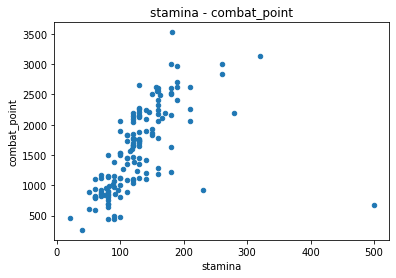

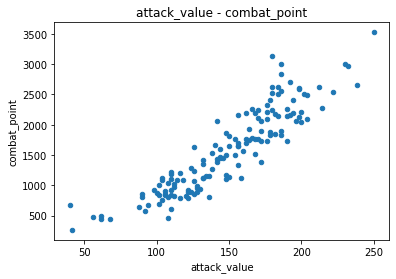

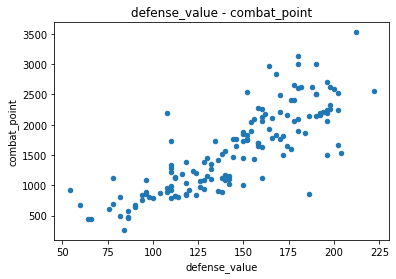

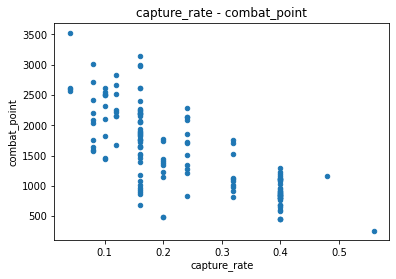

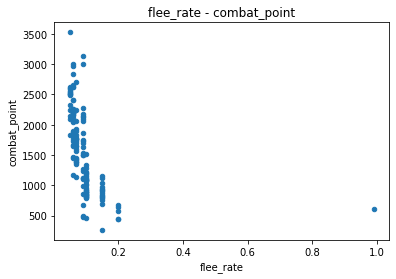

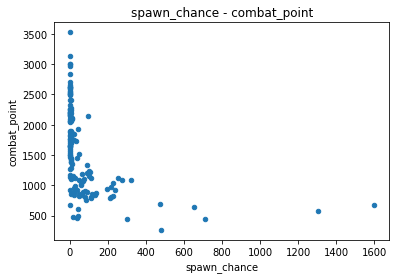

In [5]:
# plot 2-D scatter plot 
for i in range(0,6):
    df.plot(x = features[i], y = features[6], kind = "scatter")
    plt.title(f"{features[i]} - {features[6]}")
    plt.show()

In [6]:
# Pearson's correlation coefficient
data_arr = np.array(df)
arr_features = data_arr[:, 1:7].astype(dtype=np.float64)
combat_points = data_arr[:, 7].astype(dtype=np.float64)

corr_coef = []
for i in range(0,6):
    corr_coef.append(np.corrcoef(arr_features[:,i], combat_points)[0,1])

for i in range(0,6):
    print(f"The Pearson's correlation coefficient between {features[i]} and combat points is: {corr_coef[i]}")

The Pearson's correlation coefficient between stamina and combat points is: 0.5828317032229264
The Pearson's correlation coefficient between attack_value and combat points is: 0.9075315401042738
The Pearson's correlation coefficient between defense_value and combat points is: 0.8262293053572933
The Pearson's correlation coefficient between capture_rate and combat points is: -0.7430078083529389
The Pearson's correlation coefficient between flee_rate and combat points is: -0.40703421142159657
The Pearson's correlation coefficient between spawn_chance and combat points is: -0.42132699465983625


Which features are the most predictive of the number of combat points?

The Pearson's correlation coefficient between attack_value and combat points is: 0.907. Thus, **attack_value** is the most predictive of the number of combat points.

## (ii) Data exploration:

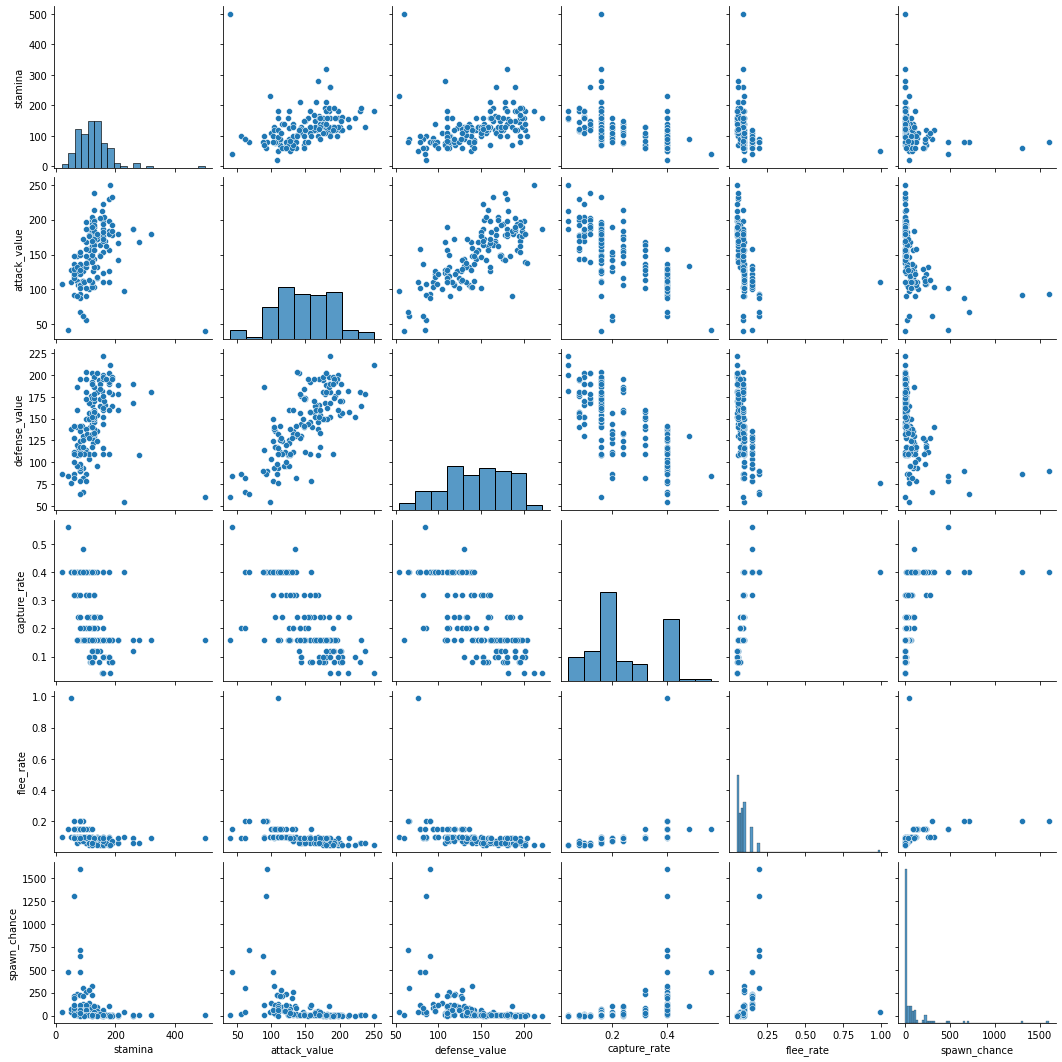

In [7]:
df_features = df[features].iloc[:,0:6]
sns.pairplot(df_features)

In [8]:
corr_coef2 = []
for i in range(0,6):
    for j in range(i+1,6): 
        corr_coef2.append(np.corrcoef(arr_features[:,i], arr_features[:,j])[0,1])

In [9]:
# Pearson's correlation coefficient

k = 0
for i in range(0,6):
     for j in range(i+1,6): 
        print(f"The Pearson's correlation coefficient between {features[i]} and {features[j]} is: {corr_coef2[k]}")
        k += 1

The Pearson's correlation coefficient between stamina and attack_value is: 0.3029949826738915
The Pearson's correlation coefficient between stamina and defense_value is: 0.3026633362536891
The Pearson's correlation coefficient between stamina and capture_rate is: -0.4468503047144595
The Pearson's correlation coefficient between stamina and flee_rate is: -0.27104753932483927
The Pearson's correlation coefficient between stamina and spawn_chance is: -0.27642020788360366
The Pearson's correlation coefficient between attack_value and defense_value is: 0.7367766467515232
The Pearson's correlation coefficient between attack_value and capture_rate is: -0.6905726716022129
The Pearson's correlation coefficient between attack_value and flee_rate is: -0.3690641419760069
The Pearson's correlation coefficient between attack_value and spawn_chance is: -0.43264844020108706
The Pearson's correlation coefficient between defense_value and capture_rate is: -0.6972657162131638
The Pearson's correlation co

Which features are the most correlated to each other?

The Pearson's correlation coefficient between attack_value and defense_value is: 0.73, which is the highest among the others. Thus, **attack_value** and **defense_value** are the most correlated to each other.

## (iii) Predicting combat points:

In [11]:
def OLS(x, y, lam=0, norm=None):
    x = np.concatenate((np.ones([x.shape[0], 1]), x), axis = 1).astype(float)
    if not norm:
        w_star = np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)
    elif norm == 'l2':
        w_star = np.linalg.pinv(x.T.dot(x) + lam * np.ones([x.shape[1], x.shape[1]])).dot(x.T).dot(y)
    return w_star

In [12]:
def cv_rss(input_arr_x, input_y, lam=0, norm=None, n_splits=5, shuffle=True, random_state=9):
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

    rss_list = []
    num_fold = 1
    for train_index, test_index in kf.split(input_arr_x):
        # generate 5-folder cross-validation
        x_train, x_test = input_arr_x[train_index], input_arr_x[test_index]
        y_train, y_test = input_y[train_index], input_y[test_index]

        # gen the model weight via OLS
        w_star = OLS(x_train, y_train, lam=lam, norm=norm)

        # evaluate by RSS
        x_test = np.concatenate((np.ones([x_test.shape[0], 1]), x_test), axis = 1).astype(float)
        y_hat = x_test.dot(w_star)
        rss = np.sum(np.square(y_hat - y_test))
        rss_list.append(rss)
        num_fold += 1
        
    avg_rss = sum(rss_list) / len(rss_list)
    return avg_rss, rss_list

In [13]:
avg_rss, rss_list = cv_rss(arr_features, combat_points)
for i, rss in enumerate(rss_list):
    print(f"The No.{i + 1} fold RSS: {rss}")
print(f"The average RSS: {avg_rss}")

The No.1 fold RSS: 2430498.2770043756
The No.2 fold RSS: 396402.14649811725
The No.3 fold RSS: 225329.3270441172
The No.4 fold RSS: 277107.4607048518
The No.5 fold RSS: 872859.7436398102
The average RSS: 840439.3909782544


## (iv) Report 

Based on your findings from questions (i) and (ii), use linear regression and experiment with different feature combinations. Please report your results.

In [14]:
print(f"Features: {list(features[0:-1])}")
print("")

# stamina
print("RSS with stamina")
arr_x0 = np.expand_dims(arr_features[:, 0], axis=1)
avg_rss, rss_list = cv_rss(arr_x0, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# attack_value
print("RSS with attack_value")
arr_x1 = np.expand_dims(arr_features[:, 1], axis=1)
avg_rss, rss_list = cv_rss(arr_x1, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# defense_value
print("RSS with defense_value")
arr_x2 = np.expand_dims(arr_features[:, 2], axis=1)
avg_rss, rss_list = cv_rss(arr_x2, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# capture_rate
print("RSS with capture_rate")
arr_x3 = np.expand_dims(arr_features[:, 3], axis=1)
avg_rss, rss_list = cv_rss(arr_x3, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# flee_rate
print("RSS with flee_rate")
arr_x4 = np.expand_dims(arr_features[:, 4], axis=1)
avg_rss, rss_list = cv_rss(arr_x4, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# spawn_chance
print("RSS with spawn_chance")
arr_x5 = np.expand_dims(arr_features[:, 5], axis=1)
avg_rss, rss_list = cv_rss(arr_x5, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# attack_value, defense_value
print("RSS with attack_value, defense_value")
arr_x12 = arr_features[:, [1, 2]]
avg_rss, rss_list = cv_rss(arr_x12, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# attack_value, defense_value, capture_rate
print("RSS with attack_value, defense_value, capture_rate")
arr_x123 = arr_features[:, [1, 2, 3]]
avg_rss, rss_list = cv_rss(arr_x123, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# attack_value, defense_value, capture_rate, stamina
print("RSS with attack_value, defense_value, capture_rate, stamina")
arr_x0123 = arr_features[:, [0, 1, 2, 3]]
avg_rss, rss_list = cv_rss(arr_x0123, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# attack_value, defense_value, capture_rate, stamina, spawn_chance
print("RSS with attack_value, defense_value, capture_rate, stamina, spawn_chance")
arr_x01235 = arr_features[:, [0, 1, 2, 3, 5]]
avg_rss, rss_list = cv_rss(arr_x01235, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

# attack_value, defense_value, capture_rate, stamina, spawn_chance, flee_rate
print("RSS with attack_value, defense_value, capture_rate, stamina, spawn_chance, flee_rate")
arr_x012345 = arr_features[:, [0, 1, 2, 3, 4, 5]]
avg_rss, rss_list = cv_rss(arr_x012345, combat_points)
print(f"The average RSS: {avg_rss}")
print("")

Features: ['stamina', 'attack_value', 'defense_value', 'capture_rate', 'flee_rate', 'spawn_chance']

RSS with stamina
The average RSS: 12826334.77637716

RSS with attack_value
The average RSS: 2516834.8210286116

RSS with defense_value
The average RSS: 4538667.106331734

RSS with capture_rate
The average RSS: 6418539.061260773

RSS with flee_rate
The average RSS: 43364103.18390721

RSS with spawn_chance
The average RSS: 11940895.670028608

RSS with attack_value, defense_value
The average RSS: 1771085.451215248

RSS with attack_value, defense_value, capture_rate
The average RSS: 1700992.023141612

RSS with attack_value, defense_value, capture_rate, stamina
The average RSS: 889921.2526775363

RSS with attack_value, defense_value, capture_rate, stamina, spawn_chance
The average RSS: 843649.734670965

RSS with attack_value, defense_value, capture_rate, stamina, spawn_chance, flee_rate
The average RSS: 840439.3909782544



### Report
From Pearson's correlation coefficient between features and combat points, we know that **attack_value** and **defense_value** are the most correlated to the number of combat points. Also, **attack_value** and **defense_value** have the lowest RSS. Thus, it's essential to include them in the model. After the experiment of different feature combinations, model with **all features** has the lowest RSS.